In [17]:
import utils
import loss
import batchgen
import models
import numpy as np
from tensorflow import keras
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE

In [8]:
INPUT_SHAPE = (400, 300, 3)

In [2]:
model = keras.models.load_model("deploy/test_minix_model.hdf5")

In [10]:
# Load data
X, Y, index = utils.load_data("data/labels/lcwaikiki_labels.csv",
                              resize = (INPUT_SHAPE[1], INPUT_SHAPE[0]), 
                              limit = 200)

  2%|▏         | 189/9995 [00:01<01:00, 162.26it/s]


In [11]:
# Compute TSNE embeddings
tsne = TSNE()
X_trm = model.predict(X.reshape(-1,*INPUT_SHAPE), verbose = 1)
tsne_embeds = tsne.fit_transform(X_trm)

202/202 [==============================] - 12s 58ms/sample


In [26]:
# Define our own plot function for plotting tsne embeddings
def scatter(x, labels, category_index = None, subtitle=None):
    classes, label_index = np.unique(labels, return_inverse=True)
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", len(classes)))
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[label_index.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for cls in classes:
        cls = int(cls)
        # Position of each label.
        if category_index:
            str_cls = category_index[int(cls)]
        else:
            str_cls = str(cls)
            
        xtext, ytext = np.median(x[labels == cls, :], axis=0)
        txt = ax.text(xtext, ytext, str_cls, fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)

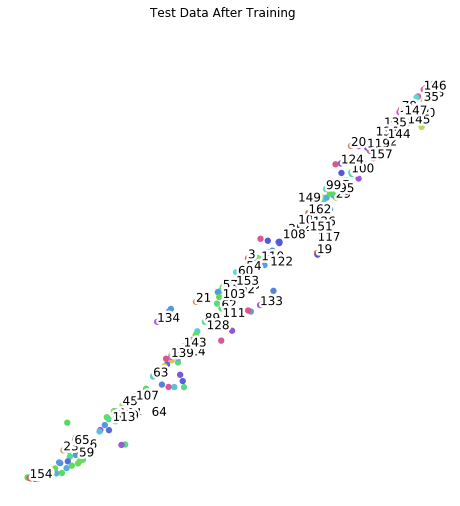

In [30]:
scatter(tsne_embeds, Y, subtitle="Test Data After Training")